#Importing the required libraries

In [2]:
!pip install pystan
!pip install fbprophet

In [3]:
import fbprophet

In [4]:
from fbprophet import Prophet

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv(r'/content/covid_19_clean_complete.csv')

#Data Preprocessing

In [8]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
df.shape

(49068, 10)

In [10]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [13]:
df['Date'].nunique()

188

#Grouping the repeated dates based on cases

In [14]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [15]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


#Model Building

In [18]:
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})

In [19]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [20]:
m=Prophet()

In [21]:
model=m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

#Forecasting for future dates

In [23]:
future_global=model.make_future_dataframe(periods=30,freq='D')

In [24]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [25]:
df_prophet.shape

(188, 5)

In [ ]:
future_global.shape

(218, 1)

In [ ]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [ ]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


#Prediction on future dates

In [26]:

prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.323896e+03,-1.240769e+05,8.265090e+04,-9.323896e+03,-9.323896e+03,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,0.0,0.0,0.0,-2.030360e+04
1,2020-01-23,-6.626094e+03,-1.179007e+05,1.009185e+05,-6.626094e+03,-6.626094e+03,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,0.0,0.0,0.0,-7.727307e+03
2,2020-01-24,-3.928293e+03,-9.913415e+04,1.070136e+05,-3.928293e+03,-3.928293e+03,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,0.0,0.0,0.0,6.127475e+03
3,2020-01-25,-1.230492e+03,-9.395231e+04,1.231526e+05,-1.230492e+03,-1.230492e+03,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,1.249814e+04
4,2020-01-26,1.467309e+03,-9.886426e+04,1.215944e+05,1.467309e+03,1.467309e+03,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,8.746118e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144165e+07,2.105891e+07,2.185578e+07,2.106459e+07,2.182546e+07,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,2.145538e+07
214,2020-08-23,2.164576e+07,2.123108e+07,2.206133e+07,2.125559e+07,2.204779e+07,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,2.165304e+07
215,2020-08-24,2.184988e+07,2.140574e+07,2.232021e+07,2.143770e+07,2.227545e+07,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,0.0,0.0,0.0,2.184773e+07
216,2020-08-25,2.205399e+07,2.156811e+07,2.251626e+07,2.161258e+07,2.251341e+07,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,0.0,0.0,0.0,2.203715e+07


In [27]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145538e+07,2.105891e+07,2.185578e+07
214,2020-08-23,2.165304e+07,2.123108e+07,2.206133e+07
215,2020-08-24,2.184773e+07,2.140574e+07,2.232021e+07
216,2020-08-25,2.203715e+07,2.156811e+07,2.251626e+07
217,2020-08-26,2.224712e+07,2.177002e+07,2.276815e+07


#Plotting the predictions with respect to yhat

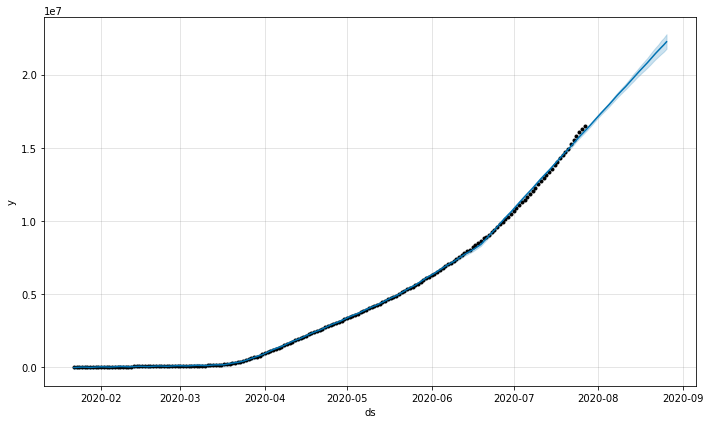

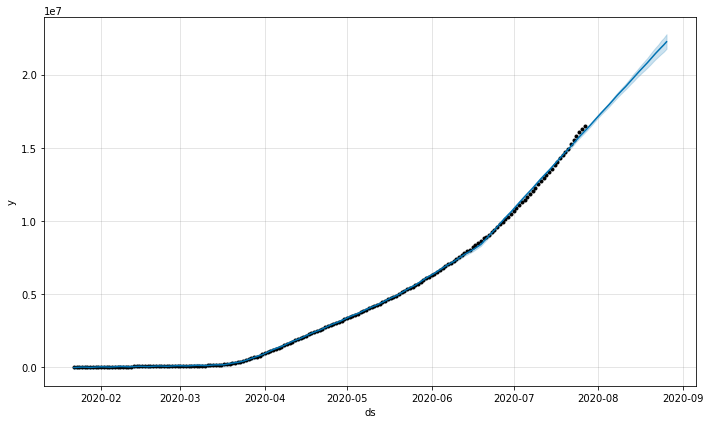

In [28]:

model.plot(prediction)

This is what our prediction looks like. The direction of overall case numbers is true, and the cases rises exponentially

#Visualizing Each Components[Trends,Weekly]


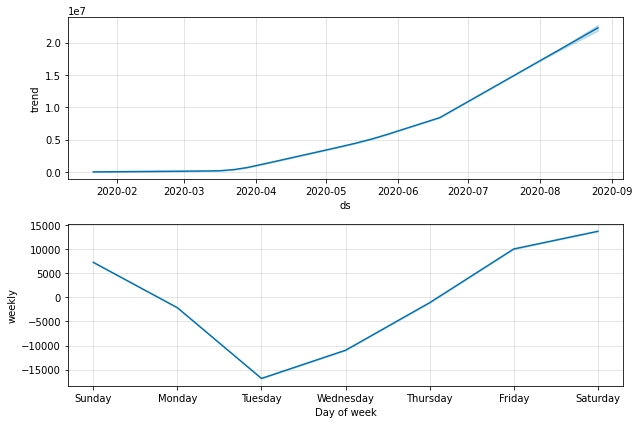

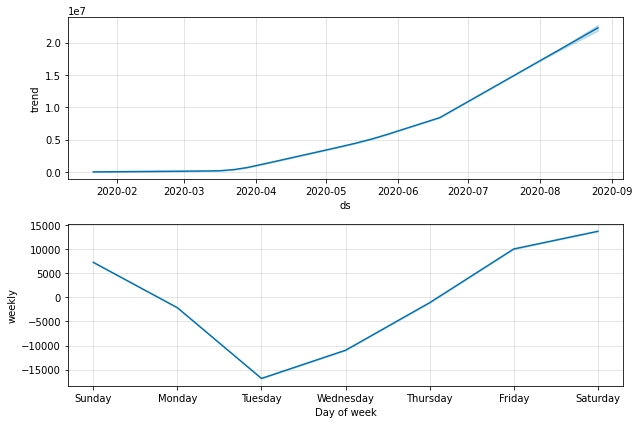

In [29]:
model.plot_components(prediction)

#To identify at which point trend starts to change

In [36]:
from fbprophet.plot import add_changepoints_to_plot

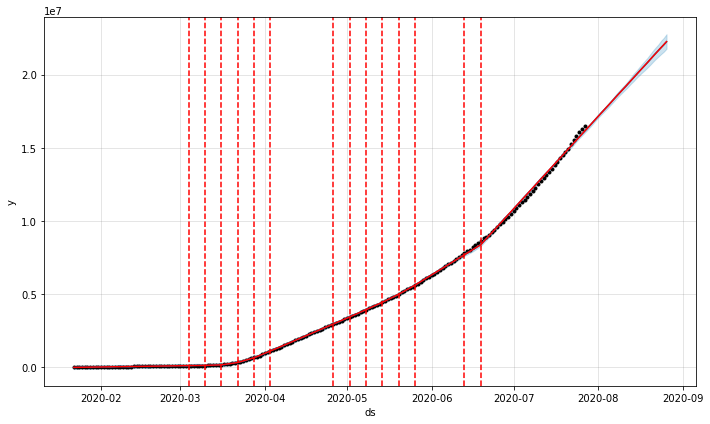

In [37]:
from fbprophet.diagnostics import cross_validation
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)

#Cross validation

Horizon='365 days'--> for how many days we have to cross validate

Period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}

Initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

In [35]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [39]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195902e+06,3.206103e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279764e+06,3.292495e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.362241e+06,3.377747e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.438823e+06,3.463785e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.514066e+06,3.548159e+06,3515244,2020-04-28


In [40]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
145,2020-07-23,1.315183e+07,1.289089e+07,1.339036e+07,15510481,2020-06-27
146,2020-07-24,1.329130e+07,1.301813e+07,1.353717e+07,15791645,2020-06-27
147,2020-07-25,1.342763e+07,1.313433e+07,1.370197e+07,16047190,2020-06-27
148,2020-07-26,1.354631e+07,1.324290e+07,1.383812e+07,16251796,2020-06-27
149,2020-07-27,1.367166e+07,1.336697e+07,1.397899e+07,16480485,2020-06-27


In [34]:
df_cv.shape

(150, 6)

#Obtaining the Performance Metrics
 We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.
   


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.732177e+10,165292.978537,129431.475977,0.016894,0.017781,0.000000
1,4 days,3.783770e+10,194519.153621,151640.363022,0.019358,0.022609,0.000000
2,5 days,5.187132e+10,227752.759122,175493.706735,0.021809,0.025662,0.066667
3,6 days,6.958295e+10,263785.805797,202488.978430,0.024588,0.026660,0.133333
4,7 days,9.037899e+10,300630.981552,232841.149368,0.027870,0.031220,0.200000


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

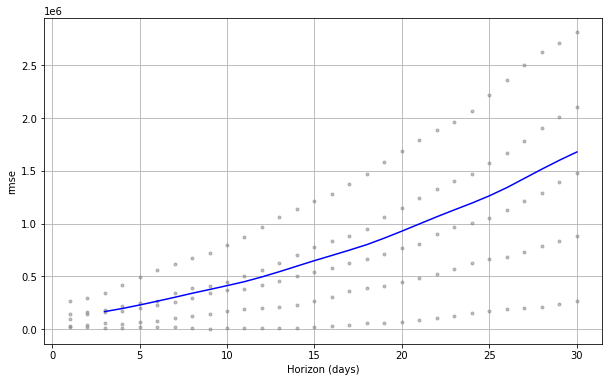

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

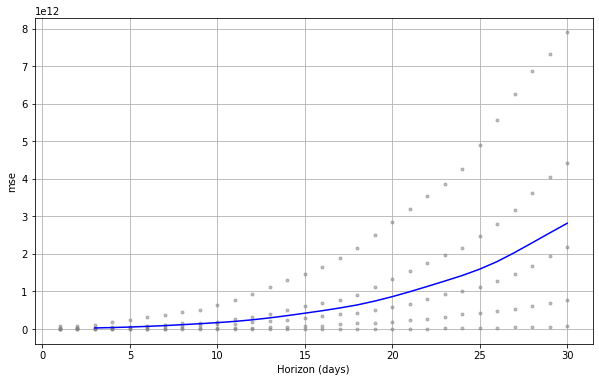

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='mse')

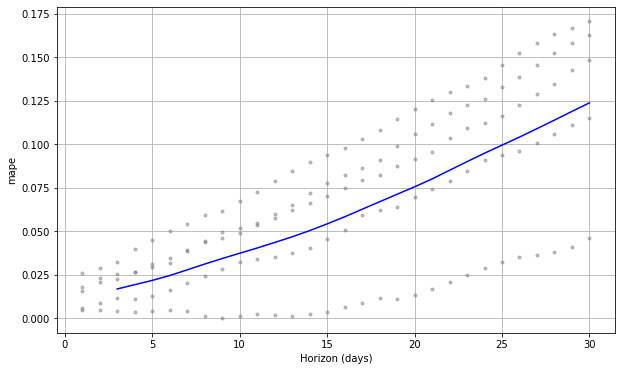

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')

From these plots, we can consider it as a best model, because the rmse,mse,mape values are low 